Available Product IDs: ['P100' 'P101' 'P102' 'P103']
Available Categories: ['Books' 'Toys' 'Electronics' 'Clothing']


Enter Product ID (P100, P101, P102, P103):  P102
Enter Category (Books, Toys, Electronics, Clothing):  Electronics



📊 Actual Sales Data for P102 in Electronics:

           Product_ID                Category  Sales
Date                                                
2024-01-01   P102P102  ElectronicsElectronics     65
2024-01-02   P102P102  ElectronicsElectronics     72
2024-01-03   P102P102  ElectronicsElectronics     68
2024-01-04   P102P102  ElectronicsElectronics     73
2024-01-05   P102P102  ElectronicsElectronics     61
...               ...                     ...    ...
2024-12-26   P102P102  ElectronicsElectronics     64
2024-12-27   P102P102  ElectronicsElectronics     68
2024-12-28   P102P102  ElectronicsElectronics     71
2024-12-29   P102P102  ElectronicsElectronics     62
2024-12-30   P102P102  ElectronicsElectronics     61

[365 rows x 3 columns]
Available data range: 2024-01-01 to 2024-12-30


Enter forecast start date (YYYY-MM-DD):  2025-06-20
Enter forecast end date (YYYY-MM-DD):  2025-06-26


D:\New folder\envs\env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)



🔮 ARIMA Forecast for P102 in Electronics from 2025-06-20 to 2025-06-26:

2025-06-20    67.464431
2025-06-21    67.464431
2025-06-22    67.464431
2025-06-23    67.464431
2025-06-24    67.464431
2025-06-25    67.464431
2025-06-26    67.464431
Freq: D, Name: predicted_mean, dtype: float64

🔮 SARIMA Forecast for P102 in Electronics from 2025-06-20 to 2025-06-26:

2025-06-20    67.806009
2025-06-21    65.953638
2025-06-22    66.882338
2025-06-23    66.092834
2025-06-24    67.497703
2025-06-25    67.999188
2025-06-26    65.516762
Freq: D, Name: predicted_mean, dtype: float64


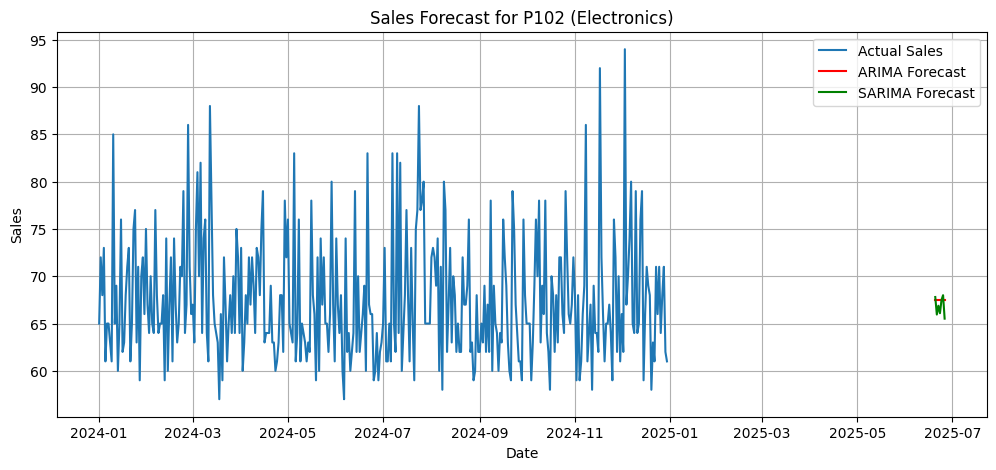

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# 📌 Load dataset
df = pd.read_csv('product_sales.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# 📌 Show available Product IDs and Categories
print("Available Product IDs:", df['Product_ID'].unique())
print("Available Categories:", df['Category'].unique())

# 📌 User inputs
product_id = input("Enter Product ID (P100, P101, P102, P103): ")
category = input("Enter Category (Books, Toys, Electronics, Clothing): ")

# 📌 Filter data for product and category
product_df = df[(df['Product_ID'] == product_id) & (df['Category'] == category)]
product_df.set_index('Date', inplace=True)
product_df = product_df.resample('D').sum()

# 📌 Show actual sales values
print(f"\n📊 Actual Sales Data for {product_id} in {category}:\n")
print(product_df)

# Check if there's enough data
if len(product_df) < 5:
    print("Not enough data for forecasting. Add more data points.")
else:
    # 📌 ARIMA model
    model_arima = ARIMA(product_df['Sales'], order=(1, 1, 1))
    model_arima_fit = model_arima.fit()

    # 📌 SARIMA model
    model_sarima = SARIMAX(product_df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_sarima_fit = model_sarima.fit(disp=False)

    # 📌 Show data index range
    print("Available data range:", product_df.index.min().date(), "to", product_df.index.max().date())

    # 📌 User inputs for forecast dates
    start_date = pd.to_datetime(input("Enter forecast start date (YYYY-MM-DD): "))
    end_date = pd.to_datetime(input("Enter forecast end date (YYYY-MM-DD): "))

    # Validate forecast date range
    if end_date <= start_date:
        print("⚠️ End date must be after start date.")
    elif start_date <= product_df.index.max():
        print("⚠️ Forecast should start after available data range.")
    else:
        # 📌 ARIMA Forecast
        forecast_arima = model_arima_fit.predict(start=start_date, end=end_date, typ='levels')
        print(f"\n🔮 ARIMA Forecast for {product_id} in {category} from {start_date.date()} to {end_date.date()}:\n")
        print(forecast_arima)

        # 📌 SARIMA Forecast
        forecast_sarima = model_sarima_fit.predict(start=start_date, end=end_date)
        print(f"\n🔮 SARIMA Forecast for {product_id} in {category} from {start_date.date()} to {end_date.date()}:\n")
        print(forecast_sarima)

        # 📌 Plot forecast
        plt.figure(figsize=(12, 5))
        plt.plot(product_df['Sales'], label='Actual Sales')
        plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
        plt.plot(forecast_sarima, label='SARIMA Forecast', color='green')
        plt.title(f'Sales Forecast for {product_id} ({category})')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid()
        plt.show()


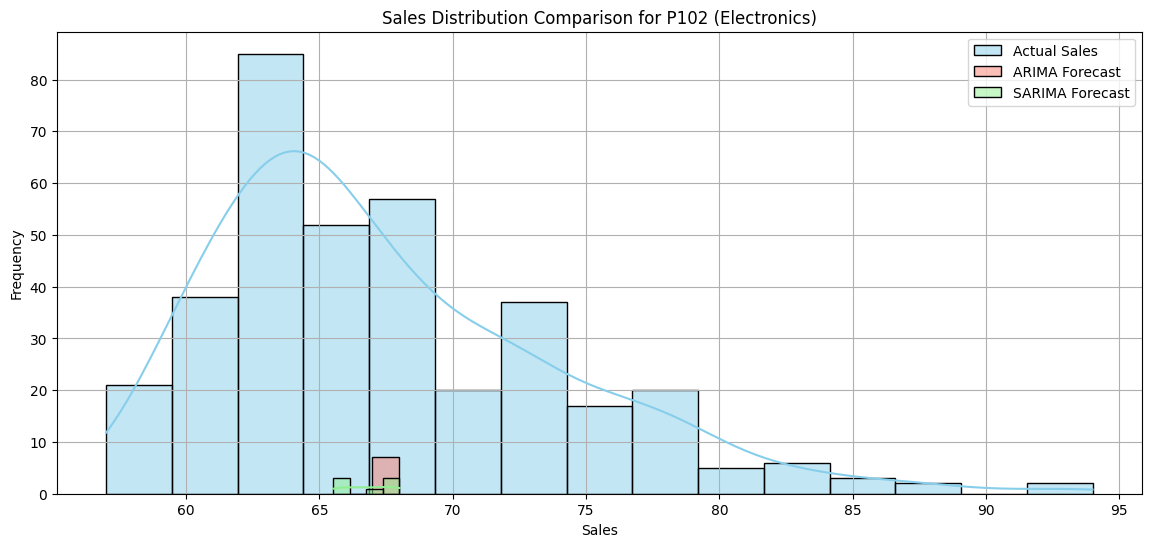

In [3]:
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram of Actual Sales
sns.histplot(product_df['Sales'], color='skyblue', kde=True, label='Actual Sales')

# Histogram of ARIMA forecast
sns.histplot(forecast_arima, color='salmon', kde=True, label='ARIMA Forecast')

# Histogram of SARIMA forecast
sns.histplot(forecast_sarima, color='lightgreen', kde=True, label='SARIMA Forecast')

plt.title(f'Sales Distribution Comparison for {product_id} ({category})')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


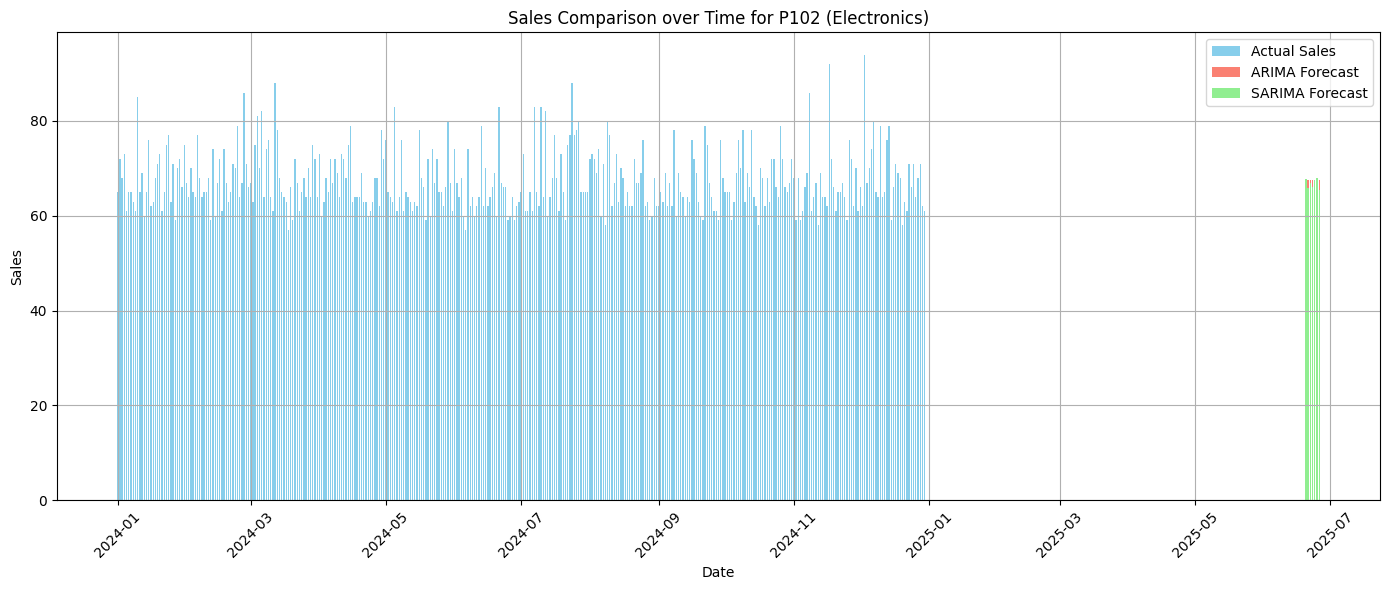

In [6]:
plt.figure(figsize=(14, 6))

# Actual Sales
plt.bar(product_df.index, product_df['Sales'], width=0.6, label='Actual Sales', color='skyblue')

# ARIMA Forecast
plt.bar(forecast_arima.index, forecast_arima.values, width=0.6, label='ARIMA Forecast', color='salmon')

# SARIMA Forecast
plt.bar(forecast_sarima.index, forecast_sarima.values, width=0.6, label='SARIMA Forecast', color='lightgreen')

plt.title(f'Sales Comparison over Time for {product_id} ({category})')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

